# Dimensionality Reduction

## Dataset construction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n_samples = 100; cov = [[3, 3], [3, 4]];

X = np.random.multivariate_normal(mean=[1, 1], cov=cov, size=n_samples)

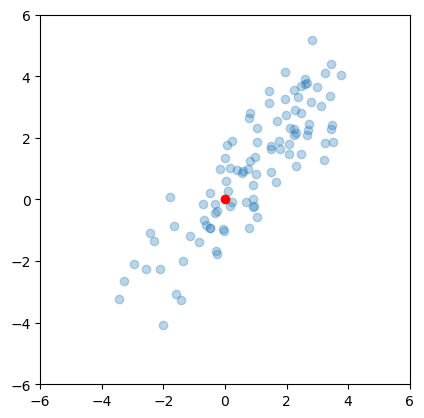

In [3]:
plt.scatter(*X.T, alpha=0.3)
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

## Standardizing the dataset

In [4]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X_standardized = (X-mean)

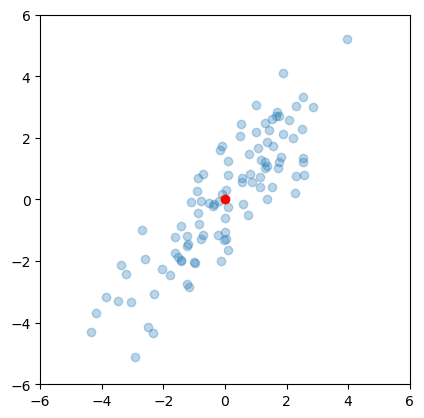

In [5]:
plt.scatter(*X_standardized.T, alpha=0.3)
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.show()

In [6]:
print(f"previous mean: {X.mean(axis=0)}, previous standard deviation: {X.std(axis=0)}")
print(f"new mean: {X_standardized.mean(axis=0)}, new standard deviation: {X_standardized.std(axis=0)}")

previous mean: [0.92780551 1.06436802], previous standard deviation: [1.75706453 2.05372084]
new mean: [ 1.86517468e-16 -2.04281037e-16], new standard deviation: [1.75706453 2.05372084]


## Eigendecomposition of the data covariance matrix

In [7]:
C = np.cov(X, rowvar=False)
Sigma, U = np.linalg.eig(C)
Sigma = np.diag(Sigma)

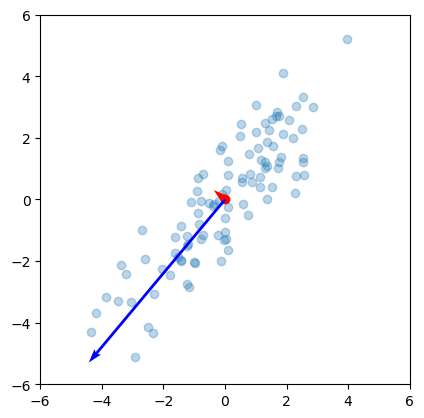

In [8]:
plt.scatter(*X_standardized.T, alpha=0.3)
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.quiver([0,0], [0,0], *U@Sigma, color=['r','b'],angles='xy', scale_units='xy', scale=1)
plt.show()

## Projecting the dataset on the first principal component

In [9]:
U1 = U[:,1].reshape(2,-1)
X_proj = (U1 @ U1.T @ X_standardized.T).T

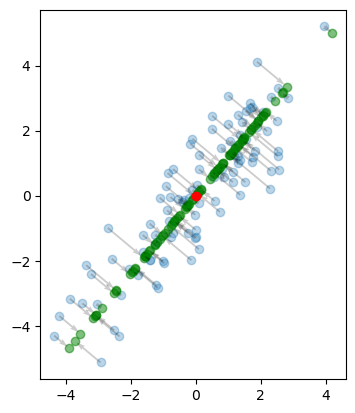

In [10]:
plt.scatter(*X_standardized.T, alpha=0.3)
plt.scatter(*X_proj.T, color="g", alpha=0.5)
plt.quiver(*X_standardized.T, *(X_proj.T-X_standardized.T), alpha=0.2, linestyle='dashed',
          linewidth=.4, color='black')
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.show()

## De-standardizing the reconstructed dataset

In [11]:
X_proj_destd = std*X_proj + mean

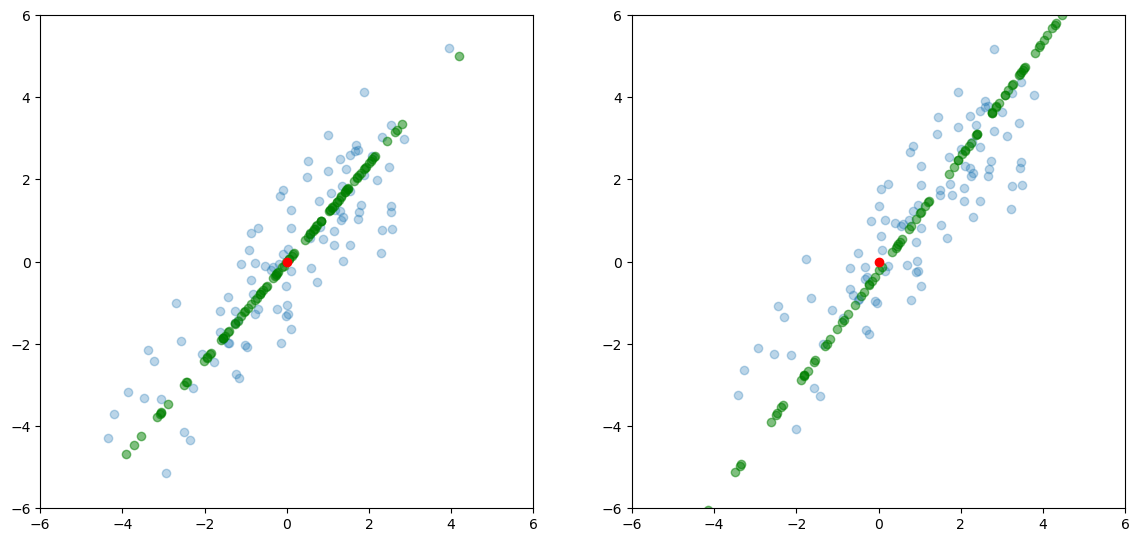

In [12]:
plt.figure(figsize=(14,14))

plt.subplot(1,2,1)
plt.scatter(*X_standardized.T, alpha=0.3)
plt.scatter(*X_proj.T, color="g", alpha=0.5)
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.xlim(-6, 6)
plt.ylim(-6, 6)


plt.subplot(1,2,2)
plt.scatter(*X.T, alpha=0.3)
plt.scatter(*X_proj_destd.T, color="g", alpha=0.5)
plt.scatter(0,0, c="r")
plt.axis("scaled")
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.show()